# OLIMPIJSKE MEDALJE

Avtorji: Andrej Skočir, Anton Martin Turk, Miha Kavs

Šolsko leto: 2023/24

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('podatki/olympic_medals.csv')

### 1. Koliko različnih disciplin je bilo skozi leta?

In [3]:
stevilo_disciplin = df['Discipline'].nunique()
print("Število razičnih disciplin:", stevilo_disciplin)

Število razičnih disciplin: 82


Koliko od teh je na poletni izvedbi in koliko na zimski?

In [4]:
# Preštejemo število edinstvenih disciplin za poletne igre
stevilo_poletnih_disciplin = df[df['Olympic_season'] == 'summer']['Discipline'].nunique()

# Preštejemo število edinstvenih disciplin za zimske igre
stevilo_zimskih_disciplin = df[df['Olympic_season'] == 'winter']['Discipline'].nunique()

print("Poletne:", stevilo_poletnih_disciplin)
print("Zimske:", stevilo_zimskih_disciplin)
print("Skupaj:", stevilo_poletnih_disciplin + stevilo_zimskih_disciplin)

Poletne: 68
Zimske: 17
Skupaj: 85


Če smo pozorni opazimo nekaj čudnega. Zgoraj smo dobili rezultat 82 različnih disciplin tukaj pa 68 poletnih in 17 zimskih kar se sešteje v 85. Zakaj nastane ta razlika treh disciplin?</br>
Poglejmo če so se kakšne discipline pojavile tako na poletnih in zimskih igrah.

In [5]:
# Izberemo discipline samo za poletne igre
poletne_discipline = set(df[df['Olympic_season'] == 'summer']['Discipline'].unique())

# Izberemo discipline samo za zimske igre
zimske_discipline = set(df[df['Olympic_season'] == 'winter']['Discipline'].unique())

# Poiščemo presek med množico disciplin za poletne in zimske igre
discipline_v_obeh = poletne_discipline.intersection(zimske_discipline)
discipline_v_obeh

{'Alpinism', 'Figure Skating', 'Ice Hockey'}

Alpinizem, umetnostno drsanje in hokej na ledu so takšne discipline, ki so se pojavile na obeh izvedbah.</br> Poglejmo si en primer:

In [6]:
# Izberemo primere, ki vsebujejo discipline, ki se pojavljajo tako na poletnih kot tudi na zimskih igrah
primeri_v_obeh = df[df['Discipline']== 'Ice Hockey']
primeri_v_obeh.head(6)

,Olympiad,Discipline,Event,Winner,Medal_type,Olympic_city,Olympic_year,Olympic_season,Gender,Code,Committee,Committee_type
1568,Antwerpen 1920,Ice Hockey,"Ice Hockey, Men",Czechoslovakia,Bronze,Antwerp,1920,summer,Men,TCH,Czechoslovakia,Former committee
1569,Antwerpen 1920,Ice Hockey,"Ice Hockey, Men",Canada,Gold,Antwerp,1920,summer,Men,CAN,Canada,Country
1570,Antwerpen 1920,Ice Hockey,"Ice Hockey, Men",United States,Silver,Antwerp,1920,summer,Men,USA,United States,Country
16938,Chamonix 1924,Ice Hockey,"Ice Hockey, Men",Great Britain,Bronze,Chamonix,1924,winter,Men,GBR,Great Britain,Country
16939,Chamonix 1924,Ice Hockey,"Ice Hockey, Men",Canada,Gold,Chamonix,1924,winter,Men,CAN,Canada,Country
16940,Chamonix 1924,Ice Hockey,"Ice Hockey, Men",United States,Silver,Chamonix,1924,winter,Men,USA,United States,Country


Kot lahko sami opazite, stolpec 'Discipline' je v vseh primerih 'Ice Hockey', medtem ko je stolpec 'Olympic_season' v treh zapisih 'summer', v treh pa 'winter'.

### 2. Število tekmovanj glede na disciplino

In [7]:
# Preštejemo število tekmovanj glede na disciplino
tekmovanja_glede_na_disciplino = df['Discipline'].value_counts()

print("Število tekmovanj glede na disciplino:")
print(tekmovanja_glede_na_disciplino)

Število tekmovanj glede na disciplino:
Discipline
Athletics              3082
Swimming               1762
Wrestling              1356
Artistic Gymnastics    1010
Boxing                  996
                       ... 
Equestrian Driving        3
Motorboating              3
Cricket                   2
Aeronautics               1
Basque pelota             1
Name: count, Length: 82, dtype: int64


Ker je disciplin 82, si je težko podatke predstavljati tekstovno.</br>
Zato si poglejmo histogram:

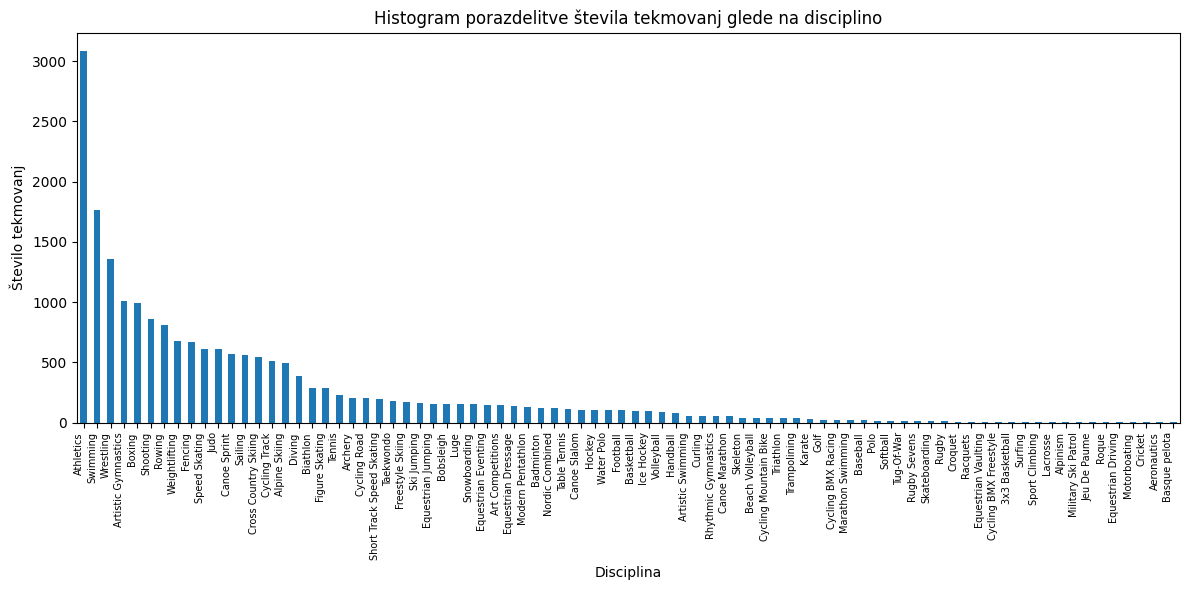

In [8]:
# Narišemo histogram porazdelitve
plt.figure(figsize=(12, 6))
tekmovanja_glede_na_disciplino.plot(kind='bar')
plt.title('Histogram porazdelitve števila tekmovanj glede na disciplino')
plt.xlabel('Disciplina')
plt.ylabel('Število tekmovanj')
plt.xticks(ha='right', fontsize=7)
plt.tight_layout()
plt.show()

Opazimo, da ima atletika daleč največ tekmovanj na disciplino, kar čez 3000, naslednje je plavanje in nato rokoborba.

### 3. Najuspešnejše države v ekipnih tekmovanjih

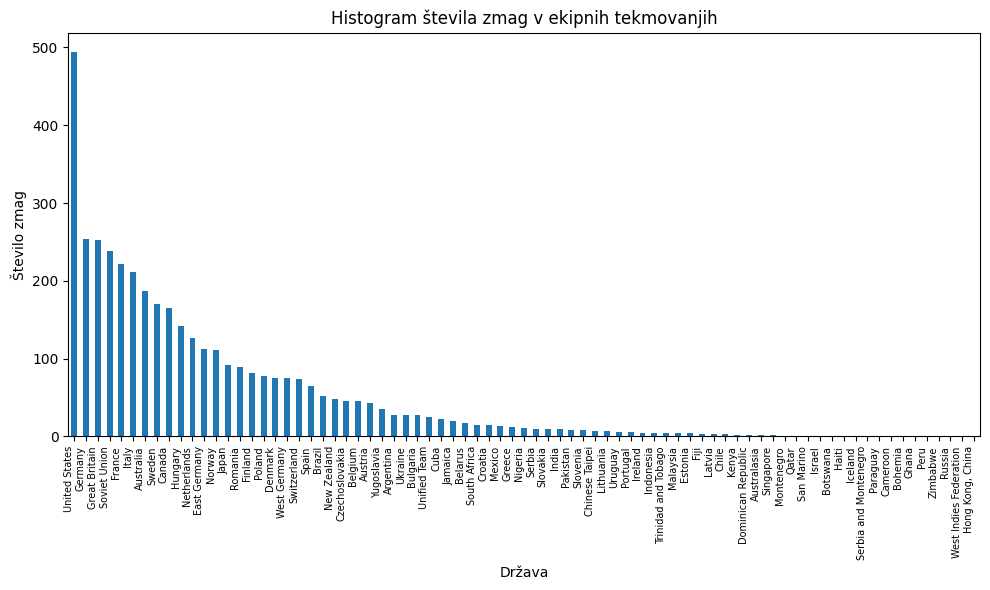

In [9]:
# Preverimo, kje je v stolpcu "Winner" navedeno ime države
ekipna_tekmovanja = df[df['Winner'] == df['Committee']]

# Preštejemo število zmag glede na državo
stevilo_zmag_na_drzavo = ekipna_tekmovanja['Winner'].value_counts()

# Narišemo histogram porazdelitve
plt.figure(figsize=(10, 6))
stevilo_zmag_na_drzavo.plot(kind='bar')
plt.title('Histogram števila zmag v ekipnih tekmovanjih')
plt.xlabel('Država')
plt.ylabel('Število zmag')
plt.xticks(ha='right', fontsize=7)
plt.tight_layout()
plt.show()

Opazimo, da so skoraj za 2x najboljše Zvezne države Amerike, pred Nemčijo in Združenim kraljestvom.

### 4. Najuspešnejši športnik

Tukaj bomo izključili vse ekipne discipline, tako da bomo dobili določenega posameznika.

In [10]:
# Določimo seznam zmagovalcev
zmagovalci = df['Winner'].unique()

# Določimo seznam držav iz stolpca "Committee"
drzave = df['Committee'].unique()

# Izločimo zmagovalce, katerih imena vsebujejo podniz, in če se ta podniz pojavi nekje v imenih držav iz stolpca "Committee"
izloceni_zmagovalci = []

for zmagovalec in zmagovalci:
    for drzava in drzave:
        for beseda in drzava.split():
            if beseda in zmagovalec.split():
                izloceni_zmagovalci.append(zmagovalec)
                break
                
# Izberemo samo tiste vrstice, kjer zmagovalci niso v seznamu izlocenih zmagovalcev
zmagovalci_brez_podniza = df[~df['Winner'].isin(izloceni_zmagovalci)]

# Izračunamo število osvojenih medalj za vsakega zmagovalca
stevilo_medalj_na_zmagovalca = zmagovalci_brez_podniza['Winner'].value_counts()
print("Najuspešnejši olimpijec: ", stevilo_medalj_na_zmagovalca.idxmax())

Najuspešnejši olimpijec:  Michael Phelps


Najuspešnejši olimpijec vseh časov je torej znani plavalec Michael Phelps.

###  5. Najuspešnjše drzave

Hočemo izvedti, katere države, imajo največje število kolajn.

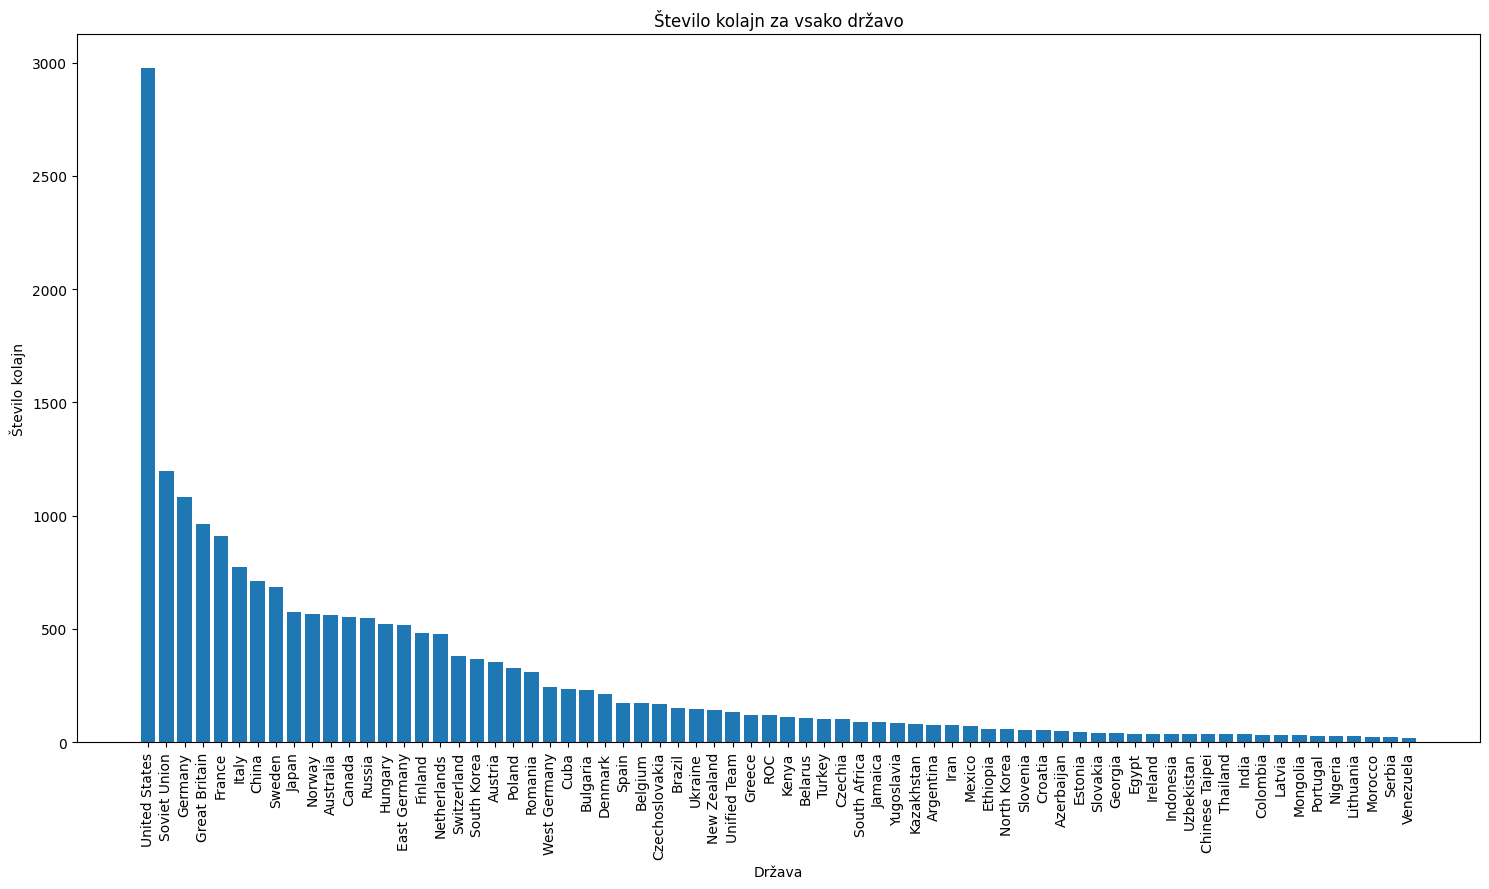

In [11]:
country_medal_counts = df['Committee'].value_counts().reset_index()
country_medal_counts.columns = ['Država', 'Število_kolajn']

# Sortiraj rezultate od največje do najmanjše
country_medal_counts_sorted = country_medal_counts.sort_values(by='Število_kolajn', ascending=False).head(70)
country_medal_counts_sorted['Država'] = country_medal_counts_sorted['Država'].replace('ROC from the abbreviation for Russian Olympic Committee', 'ROC')

# Prikaži rezultate na grafu za vse države
plt.figure(figsize=(15, 9))
plt.bar(country_medal_counts_sorted['Država'], country_medal_counts_sorted['Število_kolajn'])
plt.xlabel('Država')
plt.ylabel('Število kolajn')
plt.title('Število kolajn za vsako državo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sedaj hočemo, še izvdedti, kolikokrat so države dobile kolajno v različnih disciplinah.

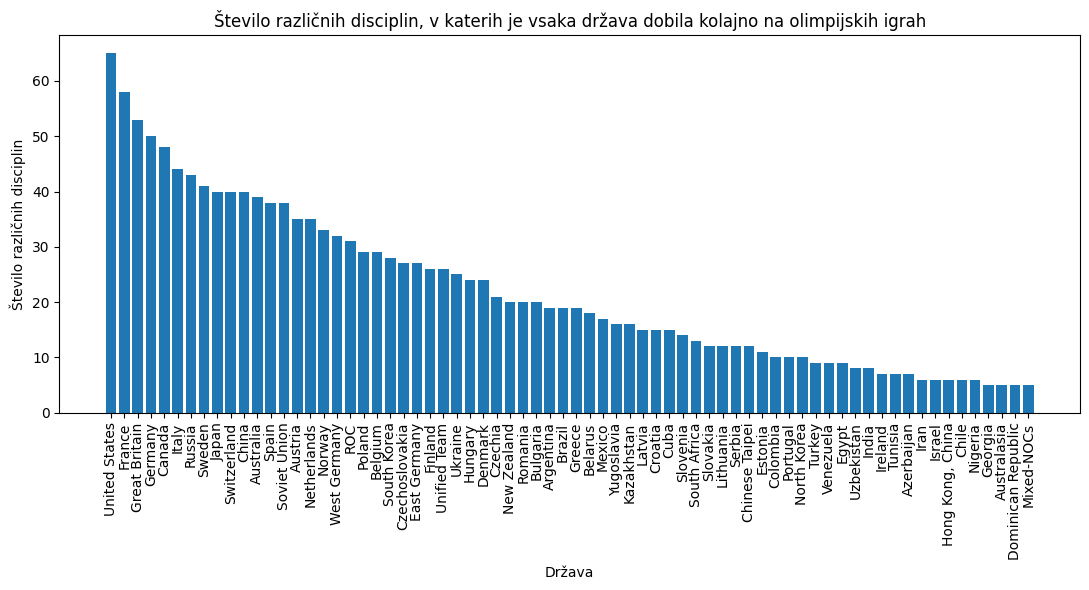

In [12]:
# Za vsako državo izračunaj število različnih disciplin, v katerih je zmagala
discipline_counts = df.groupby(['Committee', 'Discipline'])['Winner'].nunique().reset_index()
country_discipline_counts = discipline_counts.groupby('Committee').size().reset_index(name='Number_of_Disciplines')

# Sortiraj rezultate
country_discipline_counts = country_discipline_counts.sort_values(by='Number_of_Disciplines', ascending=False).head(70)

country_discipline_counts['Committee'] = country_discipline_counts['Committee'].replace('ROC from the abbreviation for Russian Olympic Committee', 'ROC')
# Prikaži rezultate na grafu
plt.figure(figsize=(11, 6))
plt.bar(country_discipline_counts['Committee'], country_discipline_counts['Number_of_Disciplines'])
plt.xlabel('Država')
plt.ylabel('Število različnih disciplin')
plt.title('Število različnih disciplin, v katerih je vsaka država dobila kolajno na olimpijskih igrah')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Tukaj je veliko korelacije z številom zmag, ampak se je vrstni red rahlo premaknil.

Sedaj pa želimo, še izvedeti, katera država, ima nejveč zlatih medalj.

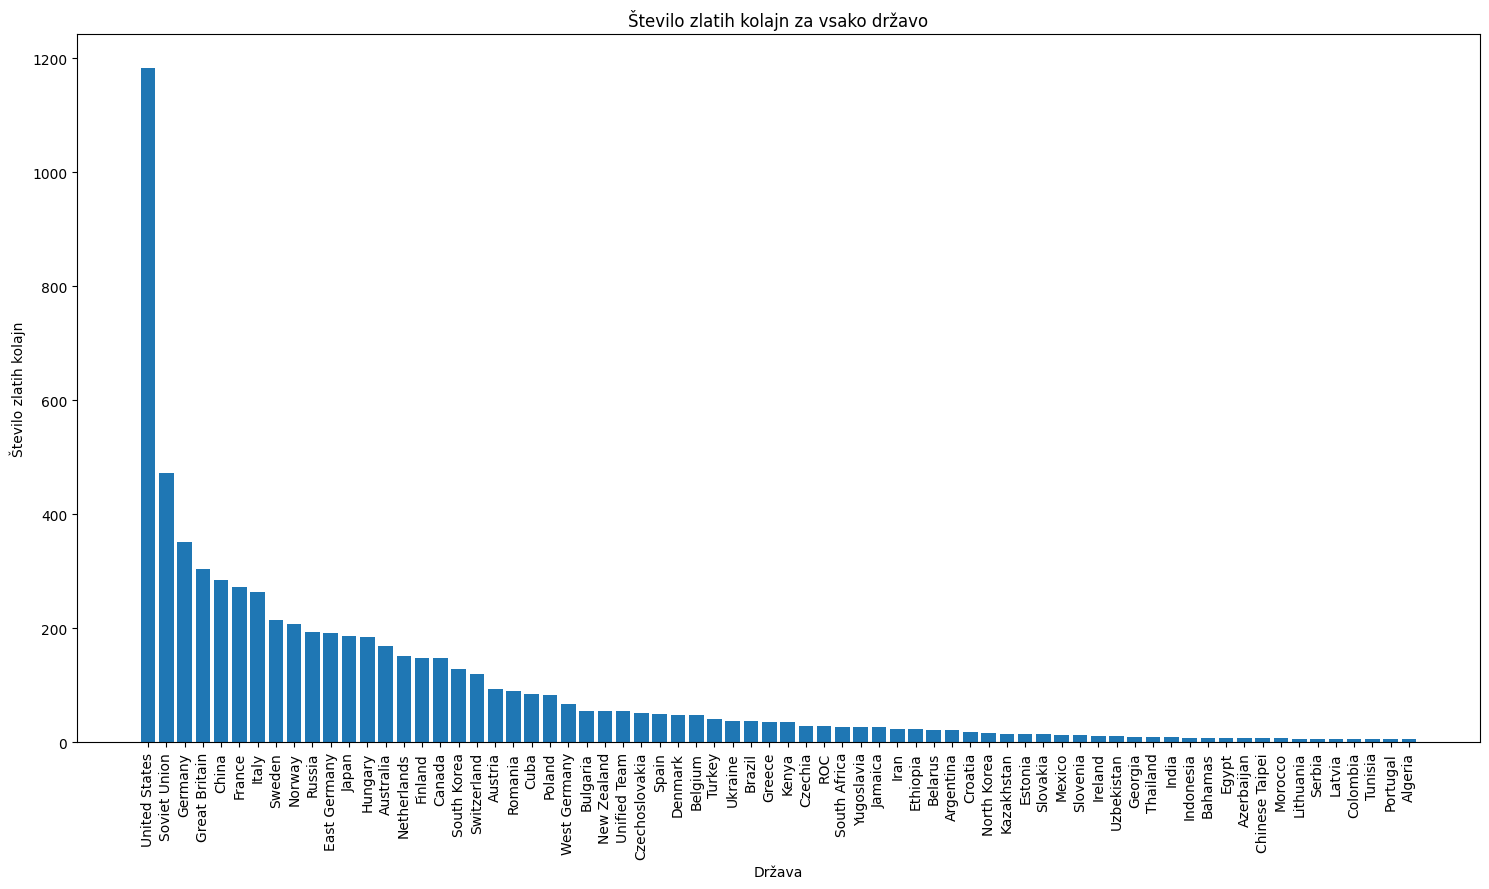

In [13]:
gold_medals_df = df[df['Medal_type'] == 'Gold']
country_gold_medal_counts = gold_medals_df['Committee'].value_counts().reset_index()
country_gold_medal_counts.columns = ['Država', 'Število_zlatih_kolajn']

country_gold_medal_counts_sorted = country_gold_medal_counts.sort_values(by='Število_zlatih_kolajn', ascending=False).head(70)
country_gold_medal_counts_sorted['Država'] = country_gold_medal_counts_sorted['Država'].replace('ROC from the abbreviation for Russian Olympic Committee', 'ROC')

plt.figure(figsize=(15, 9))
plt.bar(country_gold_medal_counts_sorted['Država'], country_gold_medal_counts_sorted['Število_zlatih_kolajn'])
plt.xlabel('Država')
plt.ylabel('Število zlatih kolajn')
plt.title('Število zlatih kolajn za vsako državo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ta graf je skoraj identičen z grafom števila vseh medalj.

In [14]:

country_total_medal_counts = df['Committee'].value_counts().reset_index()
country_total_medal_counts.columns = ['Država', 'Skupno_kolajn']

gold_medals_df = df[df['Medal_type'] == 'Gold']
country_gold_medal_counts = gold_medals_df['Committee'].value_counts().reset_index()
country_gold_medal_counts.columns = ['Država', 'Število_zlatih_kolajn']
country_medal_info = pd.merge(country_total_medal_counts, country_gold_medal_counts, on='Država', how='left')

country_medal_info['Odstotek_zlatih'] = (country_medal_info['Število_zlatih_kolajn'] / country_medal_info['Skupno_kolajn']) * 100
country_medal_info_sorted = country_medal_info.sort_values(by='Odstotek_zlatih', ascending=False).head()

for index, row in country_medal_info_sorted.iterrows():
    print(f"Država: {row['Država']}, Skupno število medalj: {row['Skupno_kolajn']}, Število zlatih medalj: {int(row['Število_zlatih_kolajn'])}, Odstotek zlatih medalj: {row['Odstotek_zlatih']:.2f}%")

Država: Kosovo, Skupno število medalj: 3, Število zlatih medalj: 3, Odstotek zlatih medalj: 100.00%
Država: Fiji, Skupno število medalj: 3, Število zlatih medalj: 2, Odstotek zlatih medalj: 66.67%
Država: Ecuador, Skupno število medalj: 5, Število zlatih medalj: 3, Odstotek zlatih medalj: 60.00%
Država: Bermuda, Skupno število medalj: 2, Število zlatih medalj: 1, Odstotek zlatih medalj: 50.00%
Država: Suriname, Skupno število medalj: 2, Število zlatih medalj: 1, Odstotek zlatih medalj: 50.00%


### 6. Slovenija

Ker je bila Slovenija prej še pod Jugoslavijo, se ji lahko prišteje tudi medalje iz Jugoslavije.

In [15]:

slovenia_medals = df[df['Committee'].str.contains('Slovenia|Yugoslavia', case=False)]
total_slovenia_medals = slovenia_medals.shape[0]
print(f"Skupno število medalj, ki jih je Slovenija, vključno z Jugoslavijo, dobila: {total_slovenia_medals}")

Skupno število medalj, ki jih je Slovenija, vključno z Jugoslavijo, dobila: 139


Sedaj pa še koliko, medalj je Slovenija osvojila po osamosvojitvi.

In [16]:

slovenia_medals_only = slovenia_medals[slovenia_medals['Committee'].str.contains('Slovenia', case=False)]
total_slovenia_medals_only = slovenia_medals_only.shape[0]
print(f"Skupno število medalj, ki jih je Slovenija pridobila (brez Jugoslavije): {total_slovenia_medals_only}")

Skupno število medalj, ki jih je Slovenija pridobila (brez Jugoslavije): 52


Sedaj pa še porazdelitev medalj.

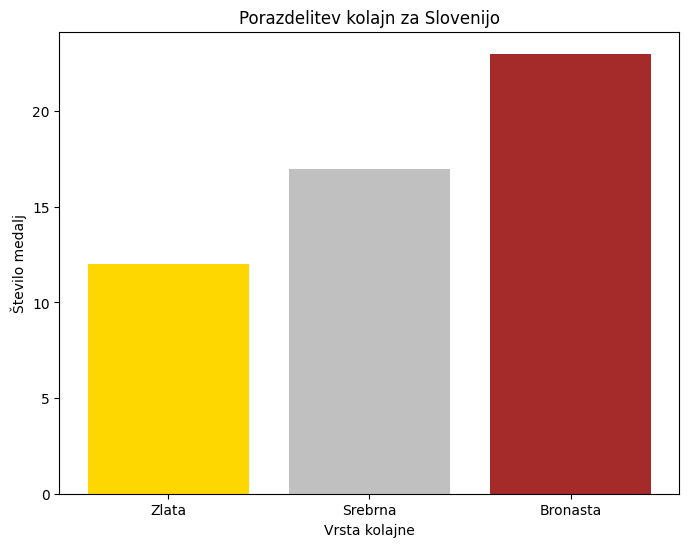

In [17]:
slovenia_medals = df[df['Committee'].str.contains('Slovenia', case=False)]
gold_count = slovenia_medals[slovenia_medals['Medal_type'] == 'Gold'].shape[0]
silver_count = slovenia_medals[slovenia_medals['Medal_type'] == 'Silver'].shape[0]
bronze_count = slovenia_medals[slovenia_medals['Medal_type'] == 'Bronze'].shape[0]
labels = ['Zlata', 'Srebrna', 'Bronasta']
counts = [gold_count, silver_count, bronze_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['gold', 'silver', 'brown'])
plt.xlabel('Vrsta kolajne')
plt.ylabel('Število medalj')
plt.title('Porazdelitev kolajn za Slovenijo')
plt.show()


Vidimo, da ima Slovenija najmanj zlatih in največ bronastih kolajn.

In [18]:
total_slovenia_medals = slovenia_medals.shape[0]
gold_percentage = (gold_count / total_slovenia_medals) * 100
print(f"Odstotek zlatih medalj za Slovenijo: {gold_percentage:.2f}%")

Odstotek zlatih medalj za Slovenijo: 23.08%


In [19]:
index_slovenia = country_medal_info[country_medal_info['Država'].str.contains('Slovenia', case=False)].index[0]
mesto_slovenia = index_slovenia + 1 
print(f"Mesto Slovenije po odstotku zlatih medalj: {mesto_slovenia}")

Mesto Slovenije po odstotku zlatih medalj: 50
